In [1]:
# =============================================================================
# FDA Drug Labeling - Exploratory Data Analysis
# =============================================================================
# Author: Darya Chyzhyk
# Date: January 2026
# Purpose: Understand structure and content of openFDA drug labeling data
# =============================================================================


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
from collections import Counter
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Plot settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [4]:
data_path = Path('../data/raw')

In [5]:
json_files = list(data_path.glob('*.json'))
print(f"Found {len(json_files)} JSON files")
print(json_files)

Found 13 JSON files
[PosixPath('../data/raw/drug-label-0012-of-0013.json'), PosixPath('../data/raw/drug-label-0007-of-0013.json'), PosixPath('../data/raw/drug-label-0006-of-0013.json'), PosixPath('../data/raw/drug-label-0001-of-0013.json'), PosixPath('../data/raw/drug-label-0013-of-0013.json'), PosixPath('../data/raw/drug-label-0003-of-0013.json'), PosixPath('../data/raw/drug-label-0004-of-0013.json'), PosixPath('../data/raw/drug-label-0011-of-0013.json'), PosixPath('../data/raw/drug-label-0010-of-0013.json'), PosixPath('../data/raw/drug-label-0005-of-0013.json'), PosixPath('../data/raw/drug-label-0002-of-0013.json'), PosixPath('../data/raw/drug-label-0008-of-0013.json'), PosixPath('../data/raw/drug-label-0009-of-0013.json')]


In [6]:
# load first file

with open(json_files[0]) as f:
    sample_data = json.load(f)

In [7]:
print("Keys in data:", sample_data.keys())

Keys in data: dict_keys(['meta', 'results'])


In [8]:
# structure

if 'results' in sample_data:
    sample_label = sample_data['results'][0]
    print("\nAvailable fields in drug label:")
    for key in sample_label.keys():
        print(f"  - {key}")


Available fields in drug label:
  - spl_product_data_elements
  - active_ingredient
  - inactive_ingredient
  - purpose
  - warnings
  - indications_and_usage
  - keep_out_of_reach_of_children
  - dosage_and_administration
  - other_safety_information
  - package_label_principal_display_panel
  - set_id
  - id
  - effective_time
  - version
  - openfda


In [9]:
len(sample_data['results'])

20000

In [10]:
# ¿Qué campos están siempre presentes?
all_labels = []
for json_file in json_files[:10]:  # Primeros 10 archivos
    with open(json_file) as f:
        data = json.load(f)
        if 'results' in data:
            all_labels.extend(data['results'])

print(f"\nTotal labels loaded: {len(all_labels)}")


Total labels loaded: 182198


In [11]:
# Frecuencia de campos
field_counts = Counter()
for label in all_labels:
    field_counts.update(label.keys())

In [12]:
# Visualizar
fields_df = pd.DataFrame([
    {'field': k, 'count': v, 'percentage': v/len(all_labels)*100}
    for k, v in field_counts.most_common()
])

print("\nField availability:")
print(fields_df.head(20))


Field availability:
                                    field   count  percentage
0                                  set_id  182198  100.000000
1                                      id  182198  100.000000
2                          effective_time  182198  100.000000
3                                 version  182198  100.000000
4                                 openfda  182198  100.000000
5               spl_product_data_elements  181985   99.883094
6   package_label_principal_display_panel  181944   99.860591
7                   indications_and_usage  175423   96.281518
8               dosage_and_administration  175056   96.080089
9                                warnings  144849   79.500873
10                    inactive_ingredient  114799   63.007827
11                                purpose  112831   61.927683
12          keep_out_of_reach_of_children  112304   61.638437
13                      active_ingredient  111011   60.928770
14               spl_unclassified_section   75090

In [13]:
# ¿Cuánto texto hay en cada sección?
sections_of_interest = [
    'indications_and_usage',
    'dosage_and_administration',
    'contraindications',
    'warnings_and_cautions',
    'adverse_reactions',
    'drug_interactions',
    'active_ingredient',
    'do_not_use',
    'how_supplied',
    'information_for_patients',
    'generic_name',
    'openfda'
    #'openfda.generic_name',
    #'openfda.manufacturer_name'
]

section_lengths = {section: [] for section in sections_of_interest}

for label in all_labels[:20000]:  # Sample de 1000
    for section in sections_of_interest:
        if section in label:
            text = label[section]
            if isinstance(text, list):
                text = ' '.join(text)
            section_lengths[section].append(len(text))


In [14]:
label

{'spl_product_data_elements': ['HYDROCODONE /APAP HYDROCODONE /APAP ACETAMINOPHEN ACETAMINOPHEN SILICON DIOXIDE CROSCARMELLOSE SODIUM CROSCARMELLOSE CROSPOVIDONE (15 MPA.S AT 5%) MAGNESIUM STEARATE CELLULOSE, MICROCRYSTALLINE STARCH, CORN STEARIC ACID HYDROCODONE BITARTRATE HYDROCODONE POVIDONE K30 (White to Off-white) U01'],
 'boxed_warning': ['WARNING: ADDICTION, ABUSE, AND MISUSE: RISK EVALUATION AND MITIGATION STRATEGY (REMS); LIFE-THREATENING RESPIRATORY DEPRESSION; ACCIDENTAL INGESTION; NEONATAL OPIOID; WITHDRAWAL SYNDROME; CYTOCHROME P450 3A4 INTERACTION; HEPATOTOXICITY and RISKS FROM CONCOMITANT USE WITH BENZODIAZEPINES OR OTHER CNS DEPRESSANTS Addiction, Abuse, and Misuse Hydrocodone bitartrate and acetaminophen tablets exposes patients and other users to the risks of opioid addiction, abuse, and misuse, which can lead to overdose and death. Assess each patient’s risk prior to prescribing hydrocodone bitartrate and acetaminophen tablets, and monitor all patients regularly for 

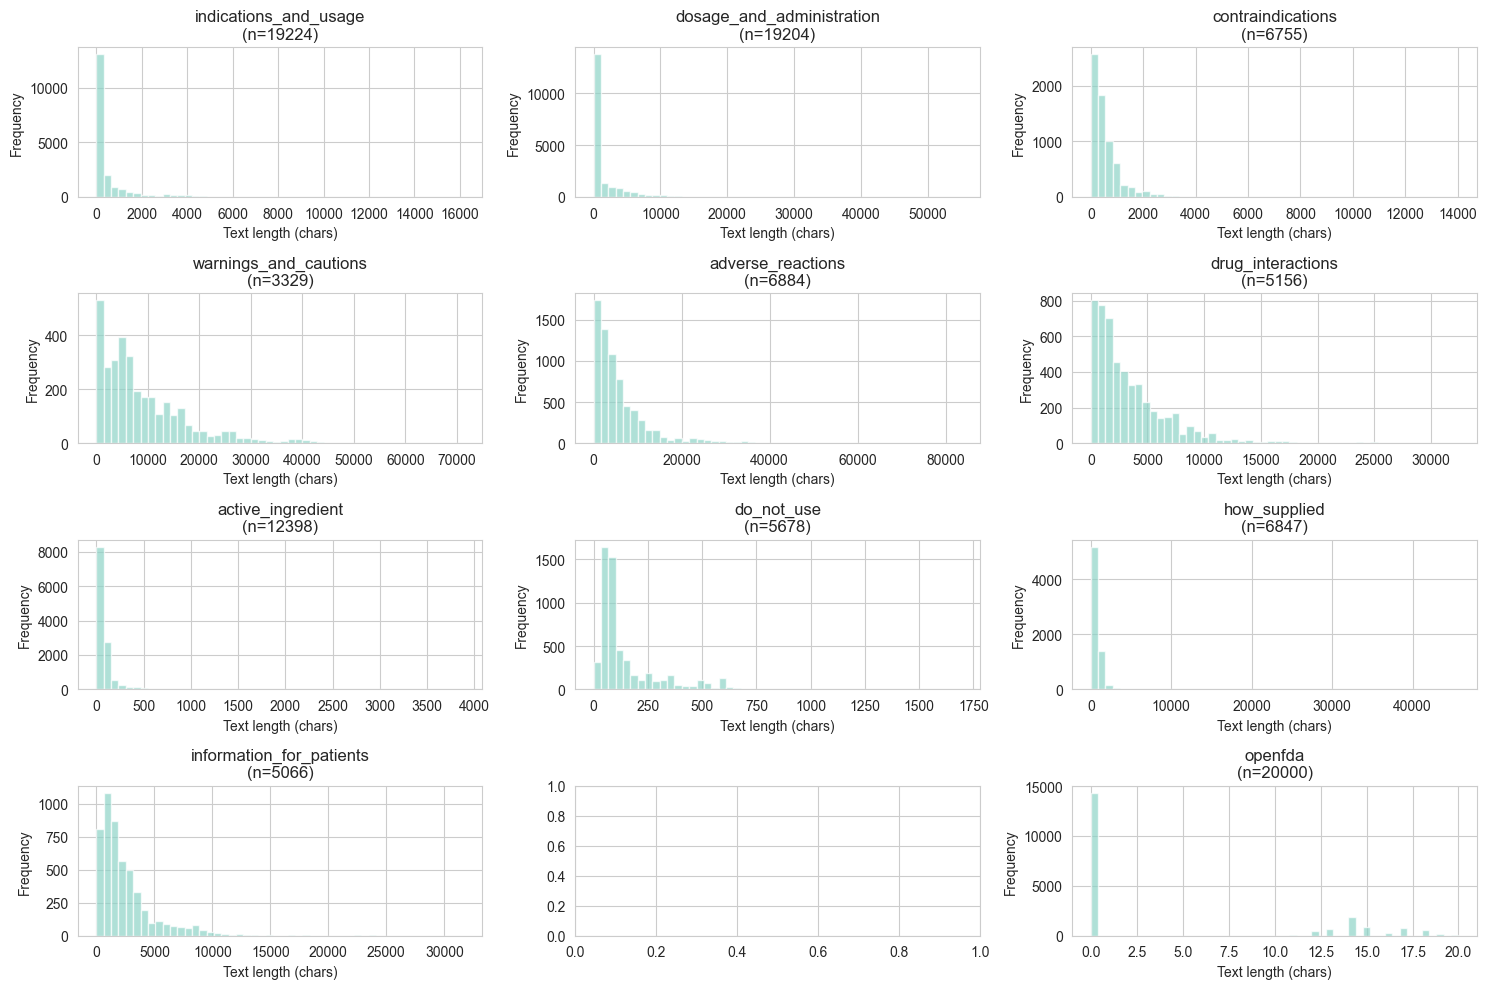

In [15]:
# Visualizar distribución de longitudes
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, section in enumerate(sections_of_interest):
    if section_lengths[section]:
        axes[idx].hist(section_lengths[section], bins=50, alpha=0.7)
        axes[idx].set_title(f'{section}\n(n={len(section_lengths[section])})')
        axes[idx].set_xlabel('Text length (chars)')
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
#plt.savefig('../docs/section_length_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [16]:
# ¿Cuántos drugs únicos hay?
drug_names = []
manufacturers = []

for label in all_labels:
    if 'openfda' in label:
        openfda = label['openfda']

        if 'brand_name' in openfda:
            names = openfda['brand_name']
            drug_names.extend(names if isinstance(names, list) else [names])

        if 'manufacturer_name' in openfda:
            manuf = openfda['manufacturer_name']
            manufacturers.extend(manuf if isinstance(manuf, list) else [manuf])

print(f"\nUnique drug names: {len(set(drug_names))}")
print(f"Unique manufacturers: {len(set(manufacturers))}")


Unique drug names: 30229
Unique manufacturers: 6514


In [17]:
# Top manufacturers
manuf_counts = Counter(manufacturers)
print("\nTop 10 manufacturers:")
for manuf, count in manuf_counts.most_common(10):
    print(f"  {manuf}: {count} drugs")


Top 10 manufacturers:
  Bryant Ranch Prepack: 3087 drugs
  A-S Medication Solutions: 2035 drugs
  Proficient Rx LP: 1549 drugs
  Boiron: 1500 drugs
  REMEDYREPACK INC.: 995 drugs
  NuCare Pharmaceuticals,Inc.: 737 drugs
  Uriel Pharmacy Inc.: 735 drugs
  Aphena Pharma Solutions - Tennessee, LLC: 670 drugs
  Preferred Pharmaceuticals Inc.: 620 drugs
  PD-Rx Pharmaceuticals, Inc.: 605 drugs


In [18]:
## Missing data

# label "openfda" contiene dictionario de otros labels

def get_nested_value(label, section):

    if section in label:
        return label[section]

    if "openfda" in label:

        openfda_data = label.get("openfda")

        if isinstance(openfda_data, list) and len(openfda_data) > 0:
            openfda_first = openfda_data[0]

            if isinstance(openfda_first, dict):
                return openfda_first.get(section)

    return None



In [19]:
label.get("openfda")


{'brand_name': ['Arnica Bryonia Special Order'],
 'generic_name': ['ARNICA BRYONIA SPECIAL ORDER'],
 'manufacturer_name': ['Uriel Pharmacy Inc.'],
 'product_ndc': ['48951-1288'],
 'product_type': ['HUMAN OTC DRUG'],
 'route': ['ORAL'],
 'substance_name': ['ACONITUM NAPELLUS',
  'ARNICA MONTANA',
  'BRYONIA ALBA ROOT'],
 'spl_id': ['6b3ec25a-65bc-de80-e053-2991aa0aa70d'],
 'spl_set_id': ['6b3ec25a-65bb-de80-e053-2991aa0aa70d'],
 'package_ndc': ['48951-1288-3'],
 'is_original_packager': [True],
 'unii': ['U0NQ8555JD', 'O80TY208ZW', 'T7J046YI2B']}

In [20]:
missing_counts = dict.fromkeys(sections_of_interest, 0)

total_labels = len(all_labels)

for label in all_labels:

    for section in sections_of_interest:

        value = get_nested_value(label, section)

        if value in [None, "", [], {}]:
            missing_counts[section] += 1

In [21]:
rows = []

for section, missing in missing_counts.items():

    if missing > total_labels:
        print(f"WARNING: {section} missing > total_labels")

    rows.append({
        "section": section,
        "missing": missing,
        "present": total_labels - missing,
        "missing_pct": missing / total_labels * 100 if total_labels > 0 else None
    })

missing_df = pd.DataFrame(rows)


In [74]:
print(len(all_labels))
print(sum(1 for x in all_labels if isinstance(x, dict)))

182198
182198


In [61]:
missing_counts = dict.fromkeys(sections_of_interest, 0)

total_labels = len(all_labels)

for label in all_labels:

    if not isinstance(label, dict):
        continue  # o lanza error si quieres ser estricto

    for section in sections_of_interest:

        value = label.get(section, None)

        is_missing = (
            section not in label or
            value is None or
            value == "" or
            value == []
        )

        if is_missing:
            missing_counts[section] += 1

In [75]:
aa = all_labels[18800]['openfda']['manufacturer_name']

In [78]:
all_labels[18800]

{'spl_product_data_elements': ['DIPHENHYDRAMINE HYDROCHLORIDE DIPHENHYDRAMINE HYDROCHLORIDE FD&C BLUE NO. 1 FD&C RED NO. 40 GELATIN GLYCERIN POLYETHYLENE GLYCOL, UNSPECIFIED WATER SORBITOL DIPHENHYDRAMINE HYDROCHLORIDE DIPHENHYDRAMINE oblong 654'],
 'spl_unclassified_section': ['Drug Facts'],
 'active_ingredient': ['Active ingredient (in each softgel) Diphenhydramine HCl 25 mg'],
 'purpose': ['Purpose Nighttime sleep-aid'],
 'indications_and_usage': ['Uses for the relief of occasional sleeplessness reduces time to fall asleep if you have difficulty falling asleep'],
 'warnings': ['Warnings Do not use for children under 12 years of age with any other product containing diphenhydramine, even one used on skin with other drugs that cause drowsiness such as antihistamines and nighttime cold/flu products Ask a doctor before use if you have a breathing problem such as asthma, emphysema, or chronic bronchitis glaucoma difficulty in urination due to enlargement of the prostate gland heart disea

In [83]:
aa = label.get(section)
print(aa)

None


In [80]:
section

'manufacturer_name'

In [84]:
label

{'spl_product_data_elements': ['Arnica Bryonia Special Order Arnica Bryonia Special Order ARNICA MONTANA ARNICA MONTANA BRYONIA ALBA ROOT BRYONIA ALBA ROOT ACONITUM NAPELLUS ACONITUM NAPELLUS WATER ALCOHOL'],
 'indications_and_usage': ['Directions: FOR ORAL USE ONLY.'],
 'dosage_and_administration': ['Take 3-4 times daily. Age 12 and older: 10 drops. Ages 2-11: 5 drops. Under age 2: Consult a doctor.'],
 'active_ingredient': ['Active Ingredients: Arnica 2X, Bryonia (White bryony) 3X, Aconitum (Monkshood) 4X'],
 'inactive_ingredient': ['Inactive Ingredients: Distilled water, 20% Organic cane alcohol'],
 'purpose': ['Use: Temporary relief of headache.'],
 'keep_out_of_reach_of_children': ['KEEP OUT OF REACH OF CHILDREN.'],
 'warnings': ['Warnings: Claims based on traditional homeopathic practice, not accepted medical evidence. Not FDA evaluated. Do not use if allergic to any ingredient. Consult a doctor before use for serious conditions or if conditions worsen or persist. If you are preg